<a href="https://colab.research.google.com/github/Bishawa/play-store-app-review-analysis/blob/main/Bishawajeet_Singha_Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Welcome to the EDA Capstone Project 

Topic - Plastore Data and User Review Data Analysis

* To begin with we are importing all the required Libraries
* Then we are going to mount the drive and import both data files and store them as pandas dataframe in variable platstore_df and review_df


In [1]:
#Importing all important libraries 
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
#Uploading the directory and file as pandas dataframe
File_directory = '/content/drive/MyDrive/AlmaBetter/Module 1-Python/EDA Capstone Project /data/'
playstore_df = pd.read_csv(File_directory + 'Play Store Data.csv')
review_df = pd.read_csv(File_directory + 'User Reviews.csv')

#Let's analyse the data by checking out the head of both the data

In [3]:
playstore_df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


# To proceed we have to first clean our data which we will do by analysing the unique data corresponding to each column and removing the unwanted data

- First check the list of columns and their types using info method and isnull method for Playstore Apps data 

In [5]:
# Inspecting the dtypes of all the columns 
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
#Inspecting the null value present in all the columns 
playstore_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

- As we can see that the column name [Type, Content Rating, current Ver, Android Ver] have very few null values so first we will get rid of them. 

# Lets clean our first column 'Type'

In [7]:
playstore_df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

- As we can see that there is a unwanted value '0' so we will check how many rows has that value and then we will get rid of it 

In [8]:
playstore_df[playstore_df['Type']== '0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


- Though we can see at row index 10472, the type is '0' but when we analyse the data we found that from column 'Category' the data is wrongly put and the data should shift one column.
- So lets do the shifting of data 

In [9]:
playstore_df.iloc[10472, 2:] = playstore_df.iloc[10472, 1: 12]

In [10]:
playstore_df.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

- But we can see the value is column Category corresponding to row index 10472 is a missmatch, so we will exchange it with NaN 

In [11]:
playstore_df['Category'].iloc[10472] = np.nan

In [12]:
playstore_df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

- Now we will get rid of the Nan by exchanging with the most common value

In [13]:
playstore_df.groupby('Type').count()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
Type,,,,,,,,,,,,
Free,10040,10039,8720,10040,10040,10040,10040,10040,10039,10040,10034,10039
Paid,800,800,647,800,800,800,800,800,800,800,798,799


- As we can see that the number of Free values is very high, so we will convert the Nan with free 

In [14]:
playstore_df['Type'].fillna('Free', inplace = True)

In [15]:
playstore_df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

# Now we repeat the above process on next column, 'Content Rating' 

In [16]:
playstore_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [17]:
playstore_df.isnull().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

# So we can observe that due to our previous steps, the Null value in Content Rating is also corrected

# Now we will check the next column Genres

In [18]:
playstore_df[playstore_df['Genres']== np.nan]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [19]:
playstore_df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

- As we can see there is one Null value, so it is advisable to drop that row

In [20]:
playstore_df.dropna(subset = ['Genres'], inplace = True)

In [21]:
playstore_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

- So we can observe that we got rid of the Nan value in column Genres

# Now we will Analyse the current version column and Android version column

In [22]:
playstore_df.dropna(subset = ['Current Ver'], inplace = True)

In [23]:
playstore_df.dropna(subset = ['Android Ver'], inplace = True)

In [24]:
playstore_df.isnull().sum()

App                  0
Category             0
Rating            1470
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

# As we have got rid of the Null values in all dataset except Rating, so now analyse the data type of the remaining columns 

- We start with Category
- Then we will check the Rating column 
- Then we wil check Review
- Then we will analyse the size column 
- Then we will analyse the Installs column
- Then we wil analyse price column 
- Then we will analyse the Last Updated column

In [25]:
playstore_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [26]:
playstore_df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4.0, nan, 4.8, 4.9,
       3.6, 3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2], dtype=object)

- As we can see the data type as object, let us now change it to data type float using pd.to_numeric function
- Then we will find the mean of all the values of Rating and replace the NaN with mean value. 

In [27]:
playstore_df['Rating'] = pd.to_numeric(playstore_df['Rating'], errors='coerce')
playstore_df['Rating'].dtype

dtype('float64')

In [28]:
mean_value_rating = playstore_df['Rating'].mean().round(1)
playstore_df['Rating'].fillna(mean_value_rating, inplace = True)

In [29]:
playstore_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [30]:
playstore_df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

- we again face the same problem with reviews, as the dtype is object, so we will change it to integer, using astype method 

In [31]:
playstore_df['Reviews'] = playstore_df['Reviews'].astype('int64')
playstore_df['Reviews'].dtype

dtype('int64')

In [32]:
#Repeating the above steps with size column, like changing the data type to float and removing unwanted values 
playstore_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [33]:
#Replacing srting with NaN
playstore_df['Size'] = playstore_df.Size.replace("Varies with device",np.nan)

In [34]:
#Droping the NaN value
playstore_df.dropna(subset = ['Size'], inplace = True)

In [35]:
def size_change(sizevalue):
  '''This function will take the value as string and if at last 'M' is present 
  it will return a float value after multiplying by 1000 
  and if at last 'k' is present it will remove 'k' and return the remaining value as float'''
  sizevalue = str(sizevalue)
  if sizevalue[-1] == 'M':
    return float(sizevalue[:-1])*1000
  elif sizevalue[-1] == 'k':
    return float(sizevalue[:-1])

In [36]:
#USing the above defined function to apply on the column 'Size'
playstore_df['Size'] = playstore_df.apply(lambda x: size_change(x['Size']), axis = 1)

In [37]:
#COnverting the datatype to float
playstore_df['Size'] = playstore_df['Size'].astype(float)

In [38]:
#Finally checking if all vaules are appropriate or not
playstore_df['Size'].unique()

array([1.90e+04, 1.40e+04, 8.70e+03, 2.50e+04, 2.80e+03, 5.60e+03,
       2.90e+04, 3.30e+04, 3.10e+03, 2.80e+04, 1.20e+04, 2.00e+04,
       2.10e+04, 3.70e+04, 5.50e+03, 1.70e+04, 3.90e+04, 3.10e+04,
       4.20e+03, 7.00e+03, 2.30e+04, 6.00e+03, 6.10e+03, 4.60e+03,
       9.20e+03, 5.20e+03, 1.10e+04, 2.40e+04, 9.40e+03, 1.50e+04,
       1.00e+04, 1.20e+03, 2.60e+04, 8.00e+03, 7.90e+03, 5.60e+04,
       5.70e+04, 3.50e+04, 5.40e+04, 2.01e+02, 3.60e+03, 5.70e+03,
       8.60e+03, 2.40e+03, 2.70e+04, 2.70e+03, 2.50e+03, 1.60e+04,
       3.40e+03, 8.90e+03, 3.90e+03, 2.90e+03, 3.80e+04, 3.20e+04,
       5.40e+03, 1.80e+04, 1.10e+03, 2.20e+03, 4.50e+03, 9.80e+03,
       5.20e+04, 9.00e+03, 6.70e+03, 3.00e+04, 2.60e+03, 7.10e+03,
       3.70e+03, 2.20e+04, 7.40e+03, 6.40e+03, 3.20e+03, 8.20e+03,
       9.90e+03, 4.90e+03, 9.50e+03, 5.00e+03, 5.90e+03, 1.30e+04,
       7.30e+04, 6.80e+03, 3.50e+03, 4.00e+03, 2.30e+03, 7.20e+03,
       2.10e+03, 4.20e+04, 7.30e+03, 9.10e+03, 5.50e+04, 2.30e

In [39]:
#Inspecting the unique values in Installs 
playstore_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '50+', '100+', '500+', '10+', '1+', '5+',
       '1,000,000,000+', '0+'], dtype=object)

- As we can see that the unique elements in installs column contain some unwanted data and also the dtype is object, so we will now try to recover this column.

In [40]:
# Removing the commas present in values of Installs with empty string
playstore_df['Installs'] = playstore_df.Installs.str.replace(",","")
# Removing the + sign from the string
playstore_df['Installs'] = playstore_df.Installs.str.replace("+","")
# Converting the datatype from object to string
playstore_df['Installs'] = playstore_df['Installs'].astype(float)
playstore_df['Installs'].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


dtype('float64')

In [41]:
#Final checking of all the unique values of Installs
playstore_df['Installs'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02, 1.e+01,
       1.e+00, 5.e+00, 1.e+09, 0.e+00])

In [42]:
#Inspecting the unique values in Price 
playstore_df['Price'].unique()

array(['0', '$4.99', '$6.99', '$1.49', '$2.99', '$3.99', '$7.99', '$5.99',
       '$1.99', '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99',
       '$11.99', '$79.99', '$16.99', '$14.99', '$1.00', '$29.99',
       '$12.99', '$3.49', '$10.99', '$7.49', '$1.50', '$19.99', '$15.99',
       '$33.99', '$74.99', '$39.99', '$2.49', '$4.49', '$1.70', '$2.00',
       '$3.88', '$25.99', '$399.99', '$17.99', '$400.00', '$3.02',
       '$1.76', '$4.84', '$4.77', '$1.61', '$1.59', '$6.49', '$1.29',
       '$5.00', '$13.99', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$19.90', '$8.49', '$1.75', '$14.00', '$4.85', '$46.99',
       '$109.99', '$154.99', '$3.08', '$2.59', '$4.80', '$8.99', '$1.96',
       '$19.40', '$15.46', '$3.04', '$4.29', '$2.60', '$3.28', '$4.60',
       '$28.99', '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99',
       '$3.61', '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [43]:
# Replacing the Dollar sign with empty string and also changing the data type to float
playstore_df['Price'] = playstore_df.Price.str.replace("$","").astype(float)
playstore_df['Price'].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


dtype('float64')

In [44]:
#Final checking of all the unique values in price 
playstore_df['Price'].unique()

array([  0.  ,   4.99,   6.99,   1.49,   2.99,   3.99,   7.99,   5.99,
         1.99,   9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,
        79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,   3.49,  10.99,
         7.49,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,   2.49,
         4.49,   1.7 ,   2.  ,   3.88,  25.99, 399.99,  17.99, 400.  ,
         3.02,   1.76,   4.84,   4.77,   1.61,   1.59,   6.49,   1.29,
         5.  ,  13.99, 299.99, 379.99,  37.99,  18.99, 389.99,  19.9 ,
         8.49,   1.75,  14.  ,   4.85,  46.99, 109.99, 154.99,   3.08,
         2.59,   4.8 ,   8.99,   1.96,  19.4 ,  15.46,   3.04,   4.29,
         2.6 ,   3.28,   4.6 ,  28.99,   2.9 ,   1.97, 200.  ,  89.99,
         2.56,  30.99,   3.61, 394.99,   1.26,   1.2 ,   1.04])

In [45]:
#Inspecting the values in column Last Updated
playstore_df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

- As we can see that it is a datetime column so we will correct the format and change the dtype to datetime

In [46]:
# Changing the data type to datetime
playstore_df['Last Updated'] = pd.to_datetime(playstore_df['Last Updated'])

In [47]:
# Checking the changes in Last Updated column
playstore_df['Last Updated'].head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]

# As we have completed the analysing of Playstore Data, now we will do the analysis and cleaning of User Review data

In [48]:
# Checking the list of columns in user review data
review_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [49]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [50]:
review_df.shape

(64295, 5)

# Thus we can observe that there are no Null value in App column but rest all have too many null values and droping them is not a good option 

- So let us analyse all columns one by one and clean the data 

In [51]:
review_df['Sentiment'].unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [52]:
# Since the number of NaN is huge and in most cases the NaN is common accross all the columns, except App, so we are going to drop the NaN data
review_df.dropna(inplace = True)

In [53]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


- By comparing the info value before and after using dropna, we can see that there is not much difference in the list of values in all columns, showing that NaN was common in all the other columns, except App, so it is an appropriate method to remove the NaN 

- Now we will check the data of each column one by one 
- we are not going to check the values in Translated Reviews as it is a string value and doesn't give any scope to comapre the data


In [54]:
# Inspecting the unique values of Sentiment
review_df['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [55]:
# Inspecting the unique values of Sentiment_Polarity
review_df['Sentiment_Polarity'].unique()

array([ 1.        ,  0.25      ,  0.4       , ..., -0.52857143,
       -0.37777778,  0.17333333])

In [56]:
# Inspecting the unique values of Sentiment_Subjectivity
review_df['Sentiment_Subjectivity'].unique()

array([0.53333333, 0.28846154, 0.875     , ..., 0.51145833, 0.7172619 ,
       0.2594697 ])

In [57]:
review_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [58]:
df1 = review_df.groupby('Sentiment')['App'].count().reset_index()
df1

,Sentiment,App
0,Negative,8271
1,Neutral,5158
2,Positive,23998


# Q1 How many apps recieved a positive or negative sentiment?
- We can observe below that most pf the app have recieved a positive review. 
- This shows that most of the apps are liked by the people and also over a few apps people are indifferent as well.


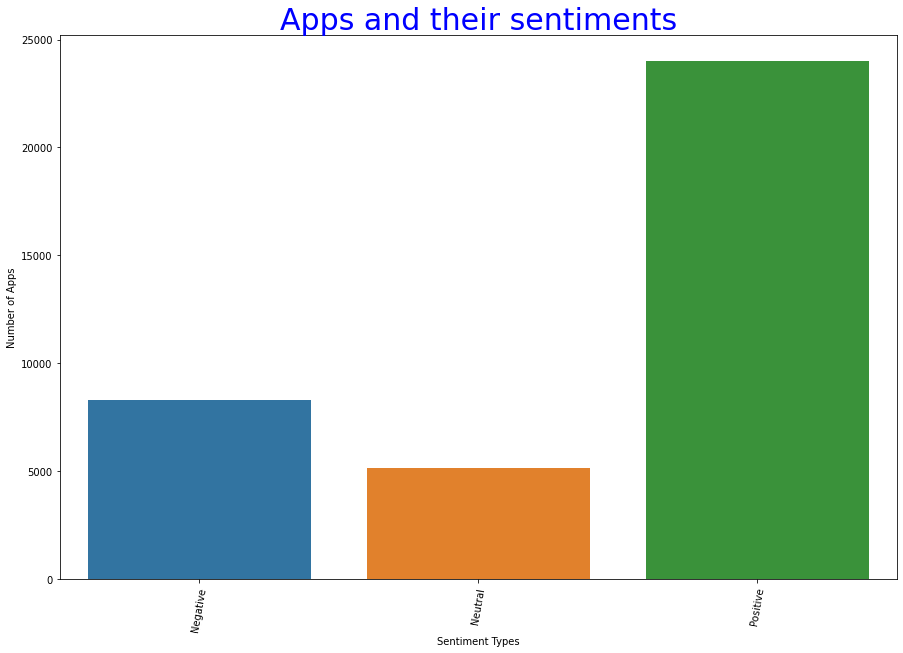

In [59]:
plt.figure(figsize=(15,10))
sns.barplot(x=df1['Sentiment'], y=df1['App'])
plt.xticks(rotation = 80)
plt.xlabel('Sentiment Types')
plt.ylabel('Number of Apps')
plt.title('Apps and their sentiments', color = 'Blue', fontsize= 30)
plt.show()

- As we can see the most of the apps have got positive reviews from the users. It is an important observation as in the later half we are going to inllustrate how reviews are linked with installs. .
- For now we can state that reviews are useful for getting more installs whcih we are going to dig deeper as we proceed the analysis

# Q2 What is the relationship between  Sentiment and Sentiment Polarity?

- We can observe that the most of the density of the positive value and the negative value are concentarated between 0 to 0.5 and 0 to -0.5 respectively. 

- Also the second graph between Sentiment Polarity and Sentiment Subjectivity shows a higher concentration of dots at the top right corner giving an indication that most are of revies are true reviews, and users are connected to the reviews in real. 

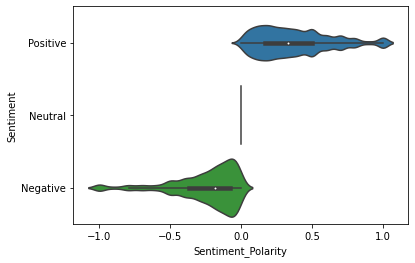

In [60]:
sns.violinplot(data = review_df, y = 'Sentiment', x = 'Sentiment_Polarity' , orient = 'h')
plt.show()

In [61]:
review_df.groupby('Sentiment')['Sentiment_Polarity'].count().reset_index()

,Sentiment,Sentiment_Polarity
0,Negative,8271
1,Neutral,5158
2,Positive,23998


- Polarity is the extent of positiveness or negativeness of the context, and as in the above violin plot we can see that the density is more concentrated towards zero, means so the mean is nearer to the zero value. 
- Also we can see that there are 23998 positive polarity where as only 8271 negative polarity, whcih shows the authencity of the positive reviews. 

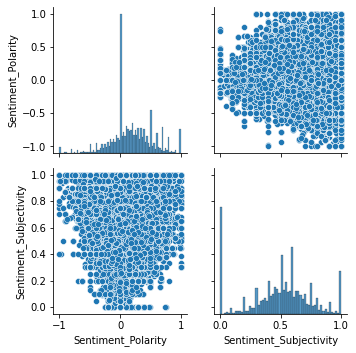

In [62]:
# This graph shows the positive relation between Polarity and Subjectivity
g = sns.PairGrid(review_df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)


- The Jointplot above shows that shows that both Sentiment_polarity and Sentiment_Subjectivity are related to each other as we can see higher concentration of scattered diagram 

# Q3 What is the correlation between Sentiment Polarity and Sentiment Subjectivity?
 - As we can see that the correlation is 0.26 whcih means that the dependency of both the data are less, whcih shows that it is not necessary that both the columns are acting in sincronisation. 
 

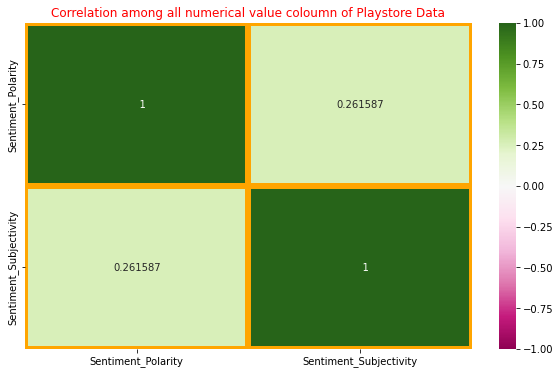

In [75]:
# plotting correlation heatmap
plt.figure(figsize=(10,6))
dataplot = sns.heatmap(review_df.corr(), annot=True, vmin= -1, fmt='5g', cmap="PiYG", cbar=True, linewidths = 5, linecolor = 'Orange')
# displaying heatmap
plt.title('Correlation among all numerical value coloumn of Playstore Data', color = 'Red')
plt.show()

In [74]:
review_df.corr()

,Sentiment_Polarity,Sentiment_Subjectivity
Sentiment_Polarity,1.000000,0.261587
Sentiment_Subjectivity,0.261587,1.000000


# Q4 What are the most number of apps available according to the category available?

- We can see that the apps under the category of Family are the most and their number is also double compared to the number of second most common category app, i.e. Games
- This shows that app developers really preferr to prepare apps related to family. 
- Follwed by Family and Games Category we have Tools, Medical and Business as the next three prferred categories. 

- The coategory under which there are least number of apps is Beauty followed by Comic, Parenting, Health, and Event


In [64]:
y = playstore_df['Category'].value_counts().index
x = playstore_df['Category'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):
  xsis.append(x[i])
  ysis.append(y[i])


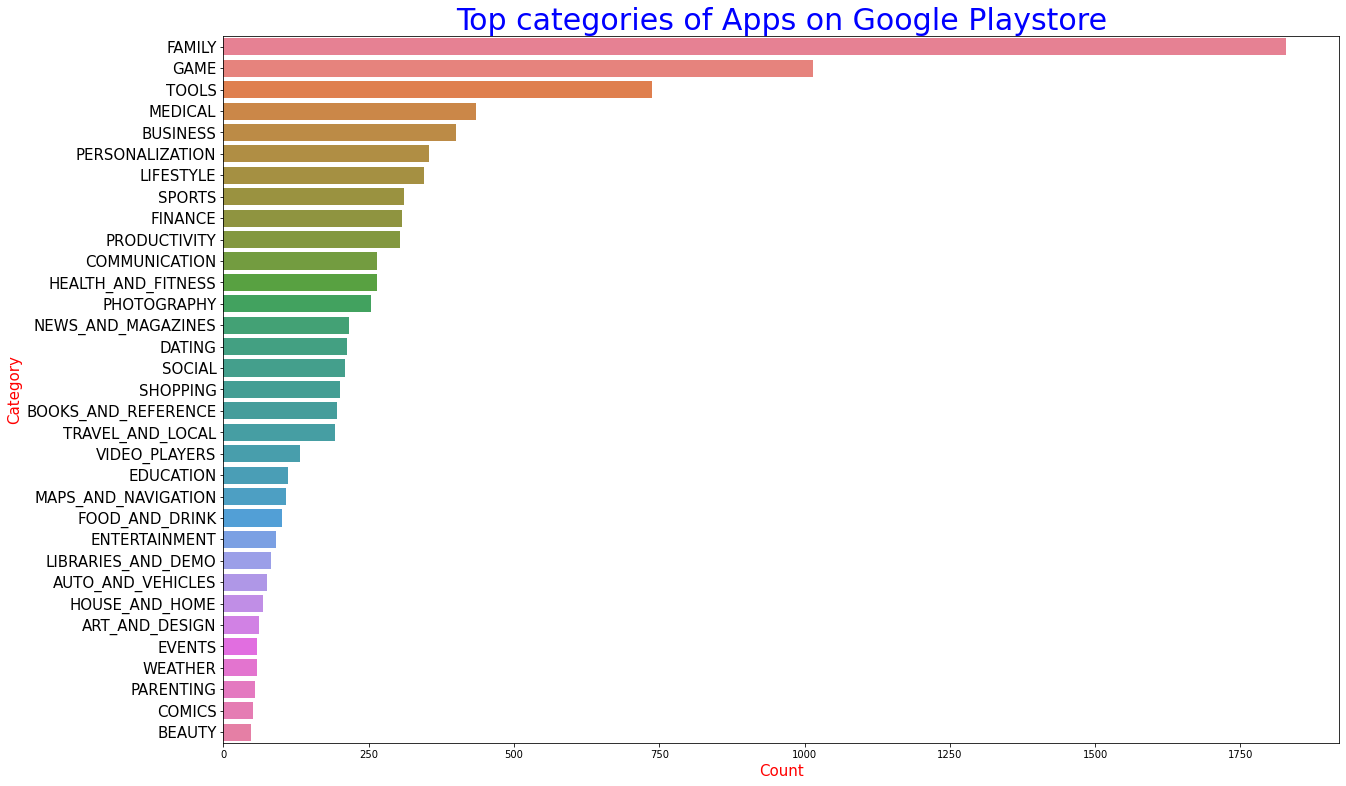

In [65]:
plt.figure(figsize=(20,13),)
plt.xlabel("Count", fontsize = 15, color = 'Red')
plt.ylabel("Category", fontsize = 15, color = 'Red')
plt.yticks(fontsize =15)
graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Top categories of Apps on Google Playstore", fontsize = 30, color = 'Blue')
plt.show()

# So we can see that there are in total 33 categories of App out of which the most prefered one is FAMILY followed by GAMES,TOOLS, MEDICAL, and BUSINESS, where as the least prefered apps are BEAUTY, COMICS, PARENTING, WEATHER, and EVENTS. 

# Now let us check the correlation between all columns of playstore data  and prepare a heatmap for the same 


# Q5 What is the corelation between different columns in the Playstore Data. 
# Insights from the correlation table 
- There is a higher digree of correlation between reviews and installs, which suggets that better reviews are important to get more installations. 
- Another important factor is that price is having a small degree of negative correlation with Rating, Reviews and installs. 

In [66]:
playstore_df.corr().round(2)

,Rating,Reviews,Size,Installs,Price
Rating,1.00,0.08,0.08,0.05,-0.02
Reviews,0.08,1.00,0.24,0.63,-0.01
Size,0.08,0.24,1.00,0.16,-0.02
Installs,0.05,0.63,0.16,1.00,-0.01
Price,-0.02,-0.01,-0.02,-0.01,1.00


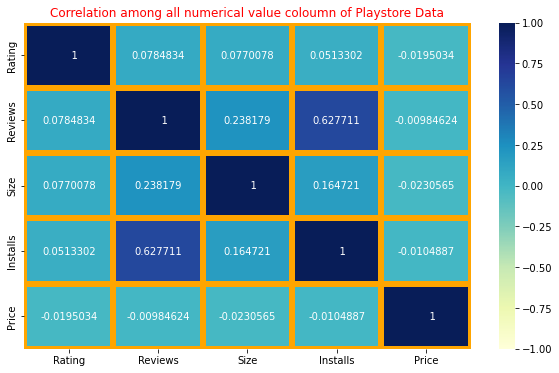

In [67]:
# plotting correlation heatmap
plt.figure(figsize=(10,6))
dataplot = sns.heatmap(playstore_df.corr(), annot=True, vmin= -1, fmt='5g', cmap="YlGnBu", cbar=True, linewidths = 5, linecolor = 'Orange')
# displaying heatmap
plt.title('Correlation among all numerical value coloumn of Playstore Data', color = 'Red')
plt.show()

# Q6 What is the average price of all paid app of different categories?

- As we can see there are many apps in the low cost or Free aone and there are very few apps whcih costs high 

- The density plot is also showing the greater concentration of apps in the range close to zero 

- The lineplot shows the apps of category Entertainment, Event, Finance, Food and Drink are highest cost applications 

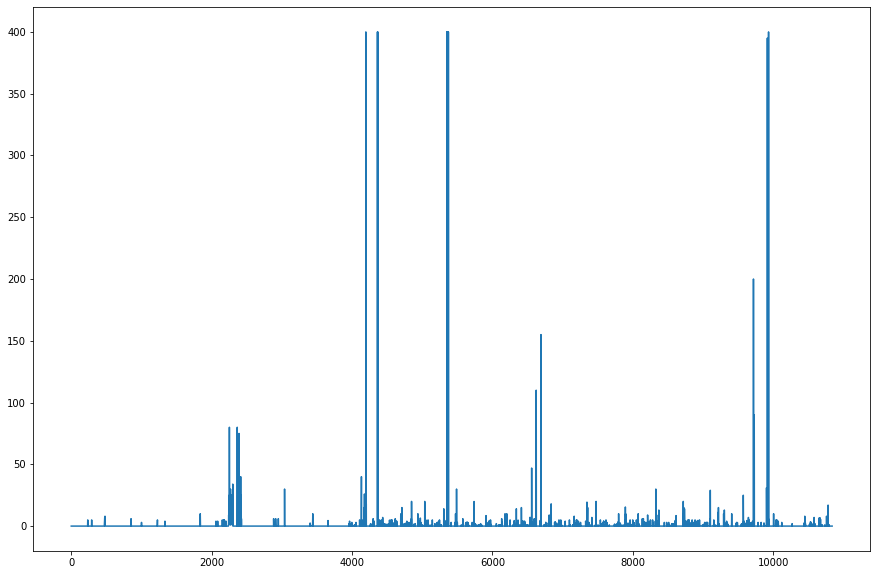

In [68]:
plt.figure(figsize = (15,10))
plt.plot(playstore_df.Price)
plt.show()

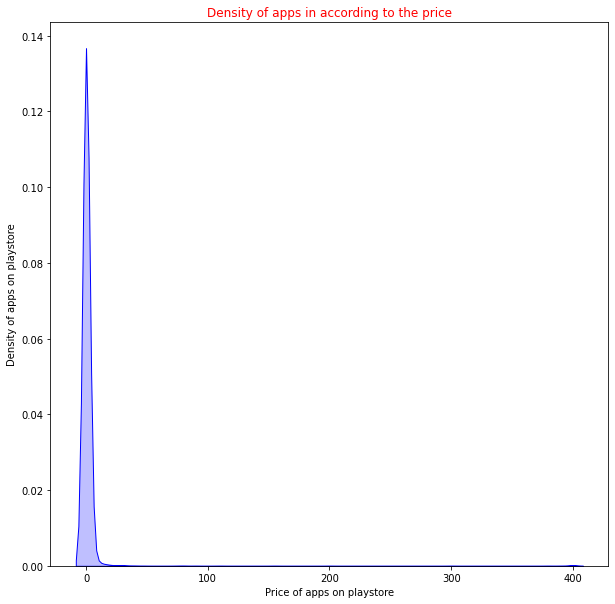

skewness: 21.771974
kurtosis: 487.052955


In [69]:
plt.figure(figsize = (10,10))
sns.kdeplot(data = playstore_df, x = playstore_df['Price'], color = 'Blue', shade = True)
plt.title('Density of apps in according to the price', color = 'Red')
plt.xlabel('Price of apps on playstore')
plt.ylabel('Density of apps on playstore')
plt.show()
print("skewness: %f" %playstore_df['Price'].skew())
print("kurtosis: %f" %playstore_df['Price'].kurt())

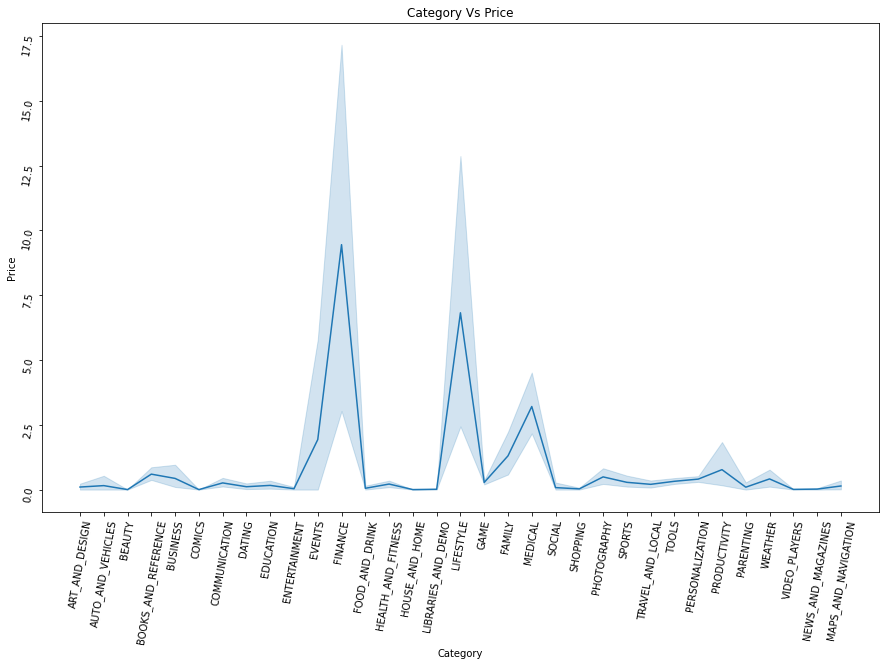

In [70]:
plt.figure(figsize=(15,9))
sns.lineplot(x= playstore_df.Category, y= playstore_df.Price)
plt.xlabel("Category")
plt.ylabel("Price")
plt.tick_params(rotation=80)
plt.title("Category Vs Price")
plt.show()

# Q7 Which category of App got greater review?

- As we can see from the bar graph, though that the most number of apps are available in the category of Family, but the Category Review recieved the highest number of reviews/ 

- Also from the heatmap of Playstore dataframe it is already clear that Rating are an important factor for installation, so we have a greater probablity of apps under Games category to get install. 

In [76]:
# Creating a list of all categories under reviews 
category_list = list(playstore_df['Category'].unique())
category_review = []
for i in category_list:
  x = playstore_df[playstore_df['Category'] == i]
  if(len(x)!=0):
    review = sum(x.Reviews)/len(x)
    category_review.append(review)
  else:
    review = sum(x.Reviews)
    category_review.append(review)

In [77]:
# Checking the outcome of the above for loop through the groupby dataframe
group_review = playstore_df.groupby('Category')['Reviews'].mean()

In [ ]:
group_review

In [78]:
data_category_reviews = pd.DataFrame({'category': category_list,'review':category_review})

In [ ]:
data_category_reviews

In [81]:
# Sorting the dataframe data_category_review in descending order
sorted_data = data_category_reviews.sort_values('review', ascending = False, ignore_index=True)

In [ ]:
sorted_data

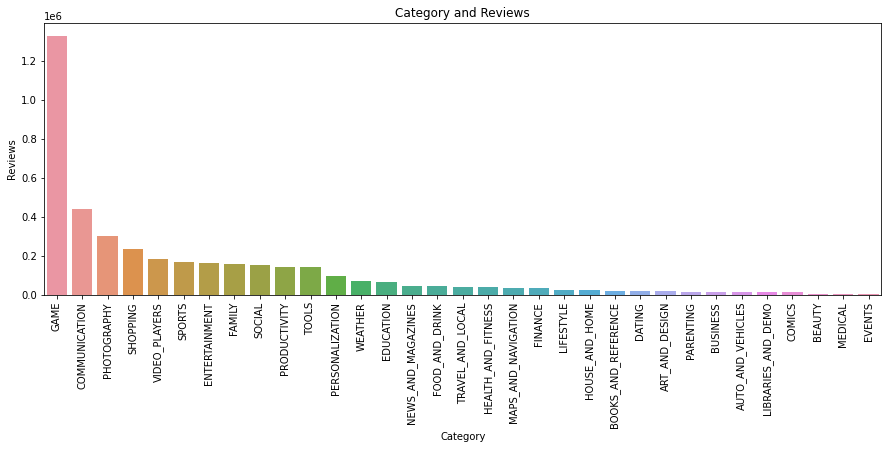

In [83]:
#visualisation
plt.figure(figsize=(15,5))
sns.barplot(x=sorted_data['category'], y=sorted_data['review'])
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.title("Category and Reviews")
plt.show()

# Q8 What is the impact of Rating on paid apps?

- What we can observe from the bar graph, is that most of the paid apps have rating 4+ whcih shows that people trust these apps, and that's why they are paid 



In [137]:
# Creating a dataframe of all paid apps only 
paid_app_playstore_df = playstore_df[playstore_df['Type']=='Paid'].reset_index()
paid_app_playstore_df.set_index('index', inplace =True)

In [138]:
paid_app_playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
index,,,,,,,,,,,,,
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.0,100000.0,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.0,100000.0,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.0,100000.0,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.0,100000.0,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
477,Calculator,DATING,2.6,57,6200.0,1000.0,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up


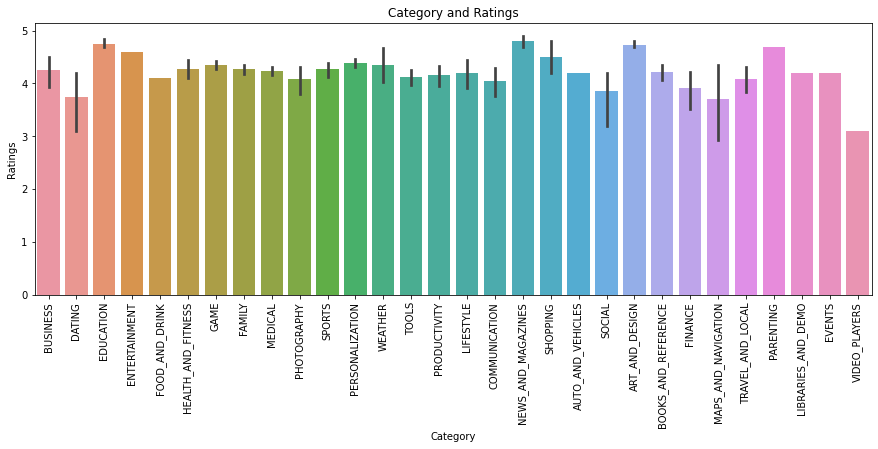

In [139]:
#visualisation
plt.figure(figsize=(15,5))
sns.barplot(x=paid_app_playstore_df['Category'], y=paid_app_playstore_df['Rating'])
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Ratings")
plt.title("Category and Ratings")
plt.show()

# Q9 What is the relationship between paid apps and Installations?

- As we can observe from the graph that paid games app has highest number of installations which means they have a greater average earning. 

- Also we can observe that most of the paid apps categories have very few installations, whcih shows that users preferr Free apps. 

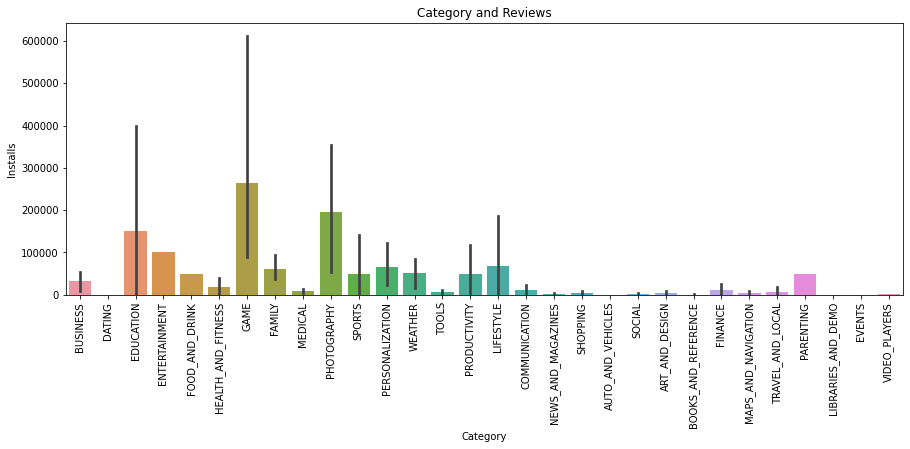

In [140]:
plt.figure(figsize=(15,5))
sns.barplot(x=paid_app_playstore_df['Category'], y=paid_app_playstore_df['Installs'])
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Category and Reviews")
plt.show()

# Q10 What is the relation between review and installation?

- Analysis

- From the above bar diagram, it is concluded that REVIEWS have no much impact on INSTALLIONS of Paid Apps. Futher, as the no. of intalls increased, the more the Reviews for those apps.

- Also, it shows that users are more frequntly giving reviews for paid apps. 

In [141]:
review_installs = paid_app_playstore_df[['App','Reviews','Installs']]

In [142]:
sorted_apps = review_installs.sort_values('Reviews', ascending = False, ignore_index=True)
sorted_apps

,App,Reviews,Installs
0,Hitman Sniper,408292,10000000.0
1,Grand Theft Auto: San Andreas,348962,1000000.0
2,Bloons TD 5,190086,1000000.0
3,Where's My Water?,188740,1000000.0
4,Card Wars - Adventure Time,129603,1000000.0
...,...,...,...
716,CZ-38 (vz 38) pistol explained,0,5.0
717,Reksio cz. 1,0,10.0
718,Glanceable Ap Watch Face,0,5.0
719,ReDNAKET DB Normalization Tool,0,10.0


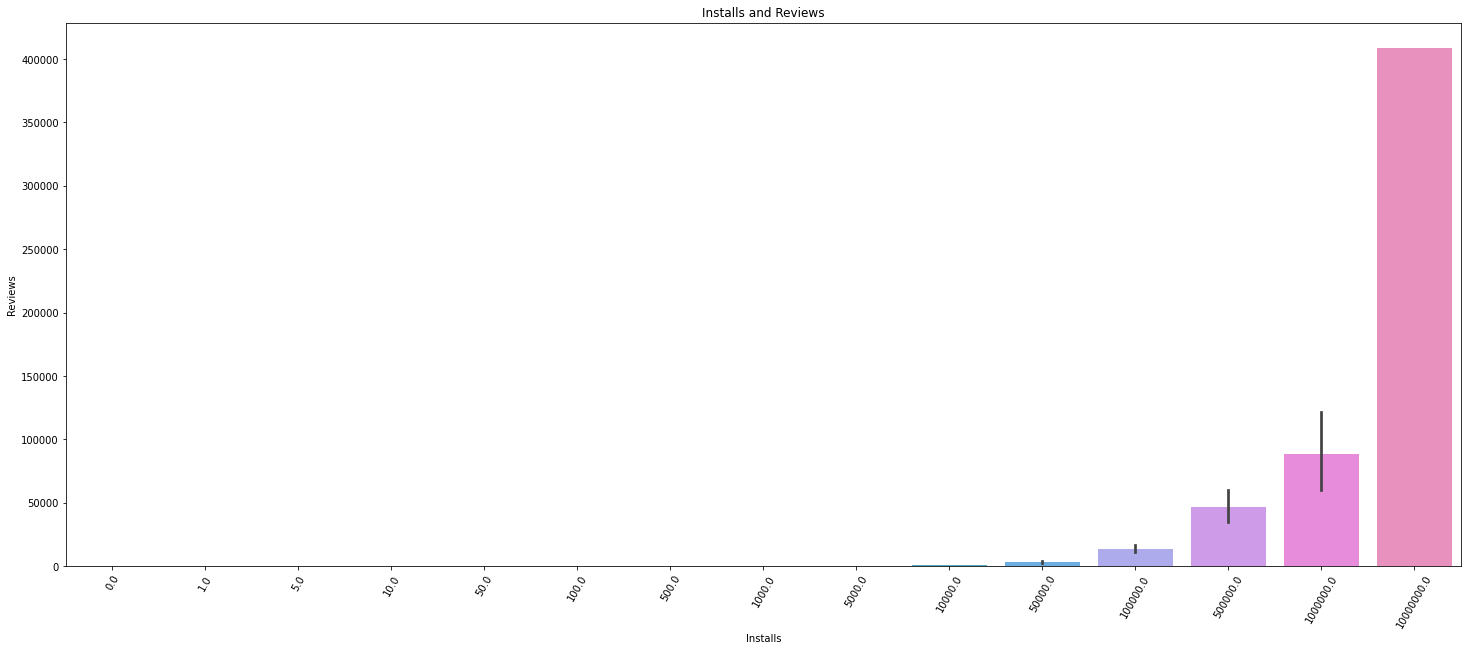

In [143]:
#visualisation
plt.figure(figsize=(25,10))
sns.barplot(x=sorted_apps['Installs'], y=sorted_apps['Reviews'])
plt.xticks(rotation=60)
plt.xlabel("Installs")
plt.ylabel("Reviews")
plt.title("Installs and Reviews")
plt.show()